Statystyka-Uczniów , Łukasz Księżarczyk, źródło : https://www.kaggle.com/datasets/sadiajavedd/students-academic-performance-dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



1. PODSTAWOWE STATYSTYKI WYNIKÓW:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

2. ŚREDNIE WYNIKI WG PŁCI:
        math score  reading score  writing score
gender                                          
female        63.6           72.6           72.5
male          68.7           65.5           63.3

3. KORELACJE MIĘDZY WYNIKAMI:
               math score  reading score  writing score
math score           1.00           0.82           0.80
reading score        0.82           1.00           0.95
writing score        0.80           0.95           1.00


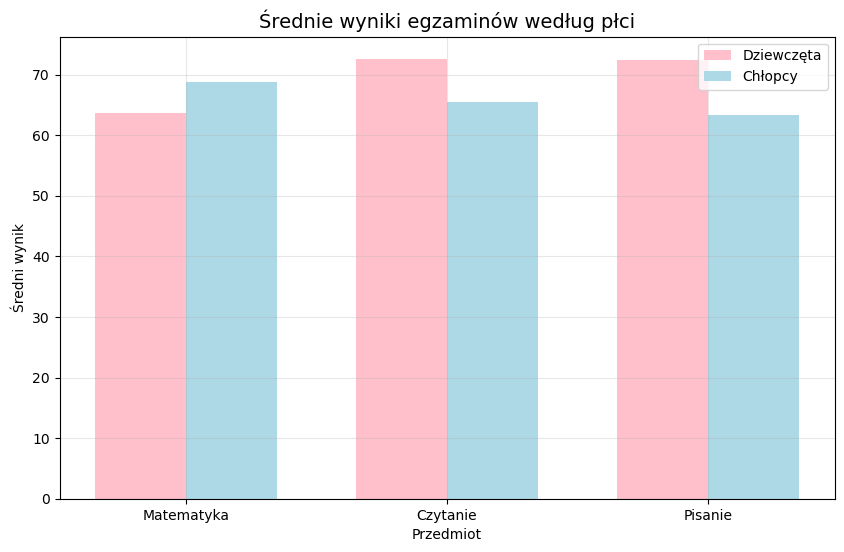

In [8]:
df.dropna()
print("\n1. PODSTAWOWE STATYSTYKI WYNIKÓW:")
print(df[['math score', 'reading score', 'writing score']].describe())

print("\n2. ŚREDNIE WYNIKI WG PŁCI:")
gender_avg = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_avg.round(1))

print("\n3. KORELACJE MIĘDZY WYNIKAMI:")
correlations = df[['math score', 'reading score', 'writing score']].corr()
print(correlations.round(2))

plt.figure(figsize=(10, 6))

subjects = ['Matematyka', 'Czytanie', 'Pisanie']
female_scores = [
    df[df['gender'] == 'female']['math score'].mean(),
    df[df['gender'] == 'female']['reading score'].mean(),
    df[df['gender'] == 'female']['writing score'].mean()
]
male_scores = [
    df[df['gender'] == 'male']['math score'].mean(),
    df[df['gender'] == 'male']['reading score'].mean(),
    df[df['gender'] == 'male']['writing score'].mean()
]

x = range(len(subjects))
bar_width = 0.35
plt.bar(x, female_scores, width=bar_width, label='Dziewczęta', color='pink')
plt.bar([i + bar_width for i in x], male_scores, width=bar_width, label='Chłopcy', color='lightblue')
plt.title('Średnie wyniki egzaminów według płci', fontsize=14)
plt.xlabel('Przedmiot')
plt.ylabel('Średni wynik')
plt.xticks([i + bar_width/2 for i in x], subjects)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
Raport:
Na wykresie możemy zauważyć że Dziewczęta osiągają lepsze wyniki w kategorii Czytania oraz Pisania , zaś chłopcy w matematyce.
Najwiekszą różnice można zaobserwować w Matematyce gdzie chłopcy posiadają najwiekszą różnice w średnich wynikach.
Najsilniejsza korelacja jest między czytaniem a pisaniem (0.95) co pokazuje ścisły związek tych umiejętności.
Dziewczęta mają profil umiejętności skierowany bardziej ku himanistycznym przedmiotom, zaś chłopcy w przedmotach ścisłych.
Wyniki sugerują potrzebę żróżnicowanych podejść dydaktynych uwzględniając różnice między płciami.